In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import io
from google.colab import files
uploaded = files.upload()

dataset = pd.read_csv(io.BytesIO(uploaded['diabetes_50_Class1.csv']))


Saving diabetes_50_Class1.csv to diabetes_50_Class1 (1).csv


Step 1: Descriptive Statistics

In [ ]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,J1
1,1,85,66,29,0,26.6,0.351,31,U1
2,8,183,64,0,0,23.3,0.672,32,D2
3,1,89,66,23,94,28.1,0.167,21,T1
4,0,137,40,35,168,43.1,2.288,33,L1


In [ ]:
# Dataset dimensions - (rows, columns)
dataset.shape

(768, 9)

In [ ]:
# Features data-type
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [ ]:
# Statistical summary
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


In [ ]:
# Count of null values
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Step 2: Data Visualization

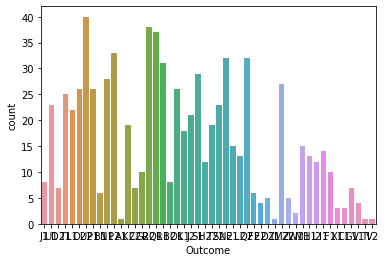

In [ ]:
# Outcome countplot
sns.countplot(x = 'Outcome',data = dataset)

Step 3: Data Preprocessing

In [ ]:
dataset_new = dataset

# Replacing zero values with NaN
dataset_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = dataset_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.NaN)

# Count of NaN
dataset_new.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
# Replacing NaN with mean values
dataset_new["Glucose"].fillna(dataset_new["Glucose"].mean(), inplace = True)
dataset_new["BloodPressure"].fillna(dataset_new["BloodPressure"].mean(), inplace = True)
dataset_new["SkinThickness"].fillna(dataset_new["SkinThickness"].mean(), inplace = True)
dataset_new["Insulin"].fillna(dataset_new["Insulin"].mean(), inplace = True)
dataset_new["BMI"].fillna(dataset_new["BMI"].mean(), inplace = True)

# Statistical summary
dataset_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.000000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.250000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.000000,122.00
SkinThickness,768.0,29.153420,8.790942,7.000,25.00000,29.153420,32.000000,99.00
Insulin,768.0,155.548223,85.021108,14.000,121.50000,155.548223,155.548223,846.00
BMI,768.0,32.457464,6.875151,18.200,27.50000,32.400000,36.600000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.626250,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.000000,81.00


In [ ]:
# Selecting features - [Glucose, Insulin, BMI, Age]
X = dataset.iloc[:, [1, 4, 5, 7]].values
Y = dataset.iloc[:, 8].values

# Splitting X and Y
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)


# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (614, 4)
X_test shape: (154, 4)
Y_train shape: (614,)
Y_test shape: (154,)


Step 4: Data Modelling

In [ ]:
# Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

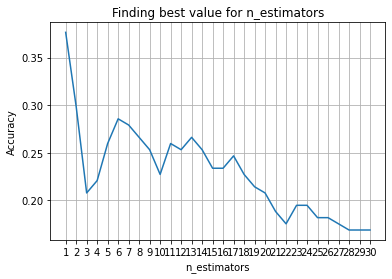

Highest value:  0.37662337662337664


In [ ]:
# Plotting a graph for n_neighbors
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

X_axis = list(range(1, 31))
acc = pd.Series()
x = range(1,31)

for i in list(range(1, 31)):
    knn_model = KNeighborsClassifier(n_neighbors = i)
    knn_model.fit(X_train, Y_train)
    prediction = knn_model.predict(X_test)
    acc = acc.append(pd.Series(metrics.accuracy_score(prediction, Y_test)))
plt.plot(X_axis, acc)
plt.xticks(x)
plt.title("Finding best value for n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.grid()
plt.show()
print('Highest value: ',acc.values.max())

In [ ]:
# K nearest neighbors Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 24, metric = 'minkowski', p = 2)
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=24, p=2,
                     weights='uniform')

In [ ]:
# Support Vector Classifier Algorithm
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
# Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
# Decision tree Algorithm
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dectree.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
# Random forest Algorithm
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 42)
ranfor.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=11,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
# Linear Discriminant Analysis
from sklearn.discriminant_analysis  import LinearDiscriminantAnalysis
ldis = LinearDiscriminantAnalysis()
ldis.fit(X_train, Y_train)


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [ ]:
# Making predictions on test dataset
Y_pred_logreg = logreg.predict(X_test)
Y_pred_knn = knn.predict(X_test)
Y_pred_svc = svc.predict(X_test)
Y_pred_nb = nb.predict(X_test)
Y_pred_dectree = dectree.predict(X_test)
Y_pred_ranfor = ranfor.predict(X_test)
Y_pred_LDA=ldis.predict(X_test)

Step 5: Model Evaluation

In [ ]:
# Evaluating using accuracy_score metric
from sklearn.metrics import accuracy_score
accuracy_logreg = accuracy_score(Y_test, Y_pred_logreg)
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
accuracy_svc = accuracy_score(Y_test, Y_pred_svc)
accuracy_nb = accuracy_score(Y_test, Y_pred_nb)
accuracy_dectree = accuracy_score(Y_test, Y_pred_dectree)
accuracy_ranfor = accuracy_score(Y_test, Y_pred_ranfor)
accuracy_LDA = accuracy_score(Y_test, Y_pred_LDA)

In [ ]:
# Accuracy on test set
print("Logistic Regression: " + str(accuracy_logreg * 100))
print("K Nearest neighbors: " + str(accuracy_knn * 100))
print("Support Vector Classifier: " + str(accuracy_svc * 100))
print("Naive Bayes: " + str(accuracy_nb * 100))
print("Decision tree: " + str(accuracy_dectree * 100))
print("Random Forest: " + str(accuracy_ranfor * 100))
print("Linear Discriminant Analysis: " + str(accuracy_LDA * 100))

Logistic Regression: 7.792207792207792
K Nearest neighbors: 19.480519480519483
Support Vector Classifier: 87.01298701298701
Naive Bayes: 89.6103896103896
Decision tree: 97.40259740259741
Random Forest: 73.37662337662337
Linear Discriminant Analysis: 92.20779220779221


#From the above comparison, we can observe that Decision tree gets the highest accuracy of  97.40259740259741

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_dectree)
cm

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [ ]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_dectree))

              precision    recall  f1-score   support

          B1       1.00      1.00      1.00         1
          C2       1.00      1.00      1.00         1
          D1       1.00      1.00      1.00         1
          D2       1.00      1.00      1.00         4
          E1       1.00      1.00      1.00         2
          E2       1.00      1.00      1.00         1
          F1       1.00      1.00      1.00         3
          F2       1.00      1.00      1.00         1
          G1       1.00      1.00      1.00         3
          G2       1.00      1.00      1.00         2
          H1       1.00      1.00      1.00         2
          H2       1.00      1.00      1.00         5
          I1       1.00      1.00      1.00         3
          I2       1.00      1.00      1.00         4
          J1       1.00      1.00      1.00         3
          J2       1.00      1.00      1.00         6
          K1       1.00      1.00      1.00         1
          K2       1.00    

In [ ]:
float_features =[]
G=float(input("Enter Glucose Level : "))
float_features.append(G)
B=float(input("Enter BloodPressure : "))
float_features.append(B)
BM=float(input("Enter BMI : "))
float_features.append(BM)
A=float(input("Enter Age : "))
float_features.append(A)
final_features = [np.array(float_features)]

predictionData =final_features

Enter Glucose Level : 130
Enter BloodPressure : 110
Enter BMI : 24
Enter Age : 32


Predicting by several algorithm

In [ ]:
# Predicting  Data

print("Preicting the vaue from different Algorithm\n")

print("\nLogistic Regression : {0}".format(logreg.predict(predictionData)))

print("\nKNeighbors Classifier :  {0}".format(knn.predict(predictionData)))

print("\nSupport Vector Classifier : {0}".format(svc.predict(predictionData)))

print("\nNaive Bays : {0}".format(nb.predict(predictionData)))

print("\nDecision Tree Classifier : {0}".format(dectree.predict(predictionData)))
outcome=dectree.predict(predictionData)

print("\nRandom Forest : {0}".format(ranfor.predict(predictionData)))

print("\nLinear Discriminant Analysis : {0}".format(ldis.predict(predictionData)))

print("\nAs we already know Decision tree gets the highest accuracy of 97.40259740259741")
print("\nThe Predicted outcome is {0}, we are going to use this outcome for further process ".format(outcome[0]))

Preicting the vaue from different Algorithm


Logistic Regression : ['H1']

KNeighbors Classifier :  ['N1']

Support Vector Classifier : ['M1']

Naive Bays : ['M1']

Decision Tree Classifier : ['M1']

Random Forest : ['M1']

Linear Discriminant Analysis : ['M1']

As we already know Decision tree gets the highest accuracy of 97.40259740259741

The Predicted outcome is M1, we are going to use this outcome for further process 


Predicting diet sheet

In [ ]:
import plotly.express as px
import plotly.graph_objs as go
# import dash_core_components as dcc
import plotly.figure_factory as ff

In [ ]:
import io
from google.colab import files
uploaded = files.upload()
diet_dataset = pd.read_csv(io.BytesIO(uploaded['Food_Supply_kcal_Data_50.csv']))
diet_dataset.head()

Saving Food_Supply_kcal_Data_50.csv to Food_Supply_kcal_Data_50.csv


,Devision,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Miscellaneous,Offals,Oilcrops,Pulses,Spices,Starchy Roots,Stimulants,Sugar Crops,Sugar & Sweeteners,Treenuts,Vegetal Products,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,A1,0.0000,4.7774,0.8504,0.0,37.1186,0.1501,0.0000,1.4757,1.2006,2.4512,0.0250,0.1251,0.1751,0.5003,0.1001,0.3252,0.0750,0.0,2.2261,0.1251,45.2476,2.3012,0.7504,4.5,29.8,0.142134,0.006186,0.123374,0.012574,38928000.0,%
1,A2,0.9120,16.0930,1.0591,0.0,16.2107,0.8091,0.1471,3.8982,3.8688,9.9441,0.0588,0.2648,1.0886,0.8091,0.0000,1.2651,0.2501,0.0,3.4422,0.3972,33.9070,2.8244,2.7508,22.3,6.2,2.967301,0.050951,1.792636,1.123714,2838000.0,%
2,B1,0.0896,6.0326,0.1941,0.0,25.0112,0.4181,0.1195,3.1805,1.2543,3.9869,0.1045,0.0597,0.2688,1.0900,0.1195,1.9262,0.1493,0.0,3.9869,0.2240,43.9749,5.7638,2.0457,26.6,3.9,0.244897,0.006558,0.167572,0.070767,44357000.0,%
3,B2,1.9388,4.6927,0.2644,0.0,18.3521,0.0441,0.8372,2.3133,2.9302,0.5067,0.0661,0.1102,1.0795,1.4981,0.0000,12.6239,0.0441,0.0,2.7539,0.0000,45.3184,4.2741,0.3525,6.8,25,0.061687,0.001461,0.056808,0.003419,32522000.0,%
4,C1,2.3041,15.3672,1.5429,0.0,13.7215,0.2057,1.7280,3.6824,7.0356,4.6904,0.3086,0.1646,0.5966,0.4526,0.3497,0.8434,0.4937,0.0,5.8218,0.0823,34.6225,4.6904,1.2960,19.1,NaN,0.293878,0.007143,0.190816,0.095918,98000.0,%


In [ ]:
diet_row=diet_dataset.loc[diet_dataset['Devision'] == outcome[0]]
print(diet_row)
X1 = diet_row.iloc[:22].values

#Getting Y value for 3 bar graph
bar_1=[X1[0][1],X1[0][5],X1[0][16],X1[0][3],X1[0][9],X1[0][10]]
bar_2=[X1[0][3],X1[0][4],X1[0][6],X1[0][7],X1[0][9],X1[0][10],X1[0][12]]
bar_3=[X1[0][1],X1[0][5],X1[0][8],X1[0][11],X1[0][13],X1[0][14],X1[0][15],X1[0][16],X1[0][17],X1[0][19],X1[0][18],X1[0][20],X1[0][22],X1[0][23],]

feature_1 = ['Alcoholic Beverages', 'Cereals - Excluding Beer', 'Starchy Roots','Animal fats', 'Meat','Milk - Excluding Butter']
feature_2=['Animal fats', 'Aquatic Products, Other', 'Eggs', 'Fish, Seafood', 'Meat','Milk - Excluding Butter', 'Offals']
feature_3=['Alcoholic Beverages', 'Cereals - Excluding Beer', 'Fruits - Excluding Wine', 'Miscellaneous', 'Oilcrops', 'Pulses','Spices', 'Starchy Roots', 'Stimulants', 'Sugar & Sweeteners', 'Sugar Crops', 'Treenuts','Vegetable Oils', 'Vegetables']

   Devision  Alcoholic Beverages  ...  Population  Unit (all except Population)
24       M1               1.4153  ...  15497000.0                             %

[1 rows x 32 columns]


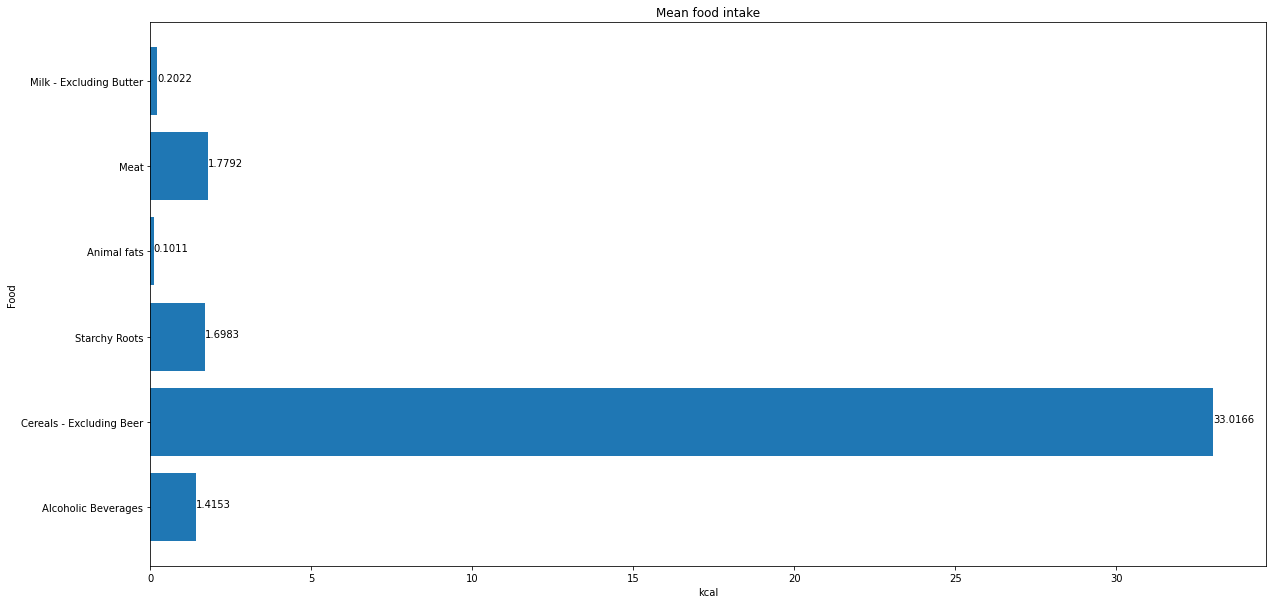

In [ ]:
fig = plt.figure(figsize = (20, 10))

# creating the bar plot
plt.barh(feature_1, bar_1)
#plt.barh(feature,bar_1)

for index, value in enumerate(bar_1):
    plt.text(value, index, str(value))

plt.xlabel("kcal")
plt.ylabel("Food")
plt.title("Mean food intake")
plt.show()


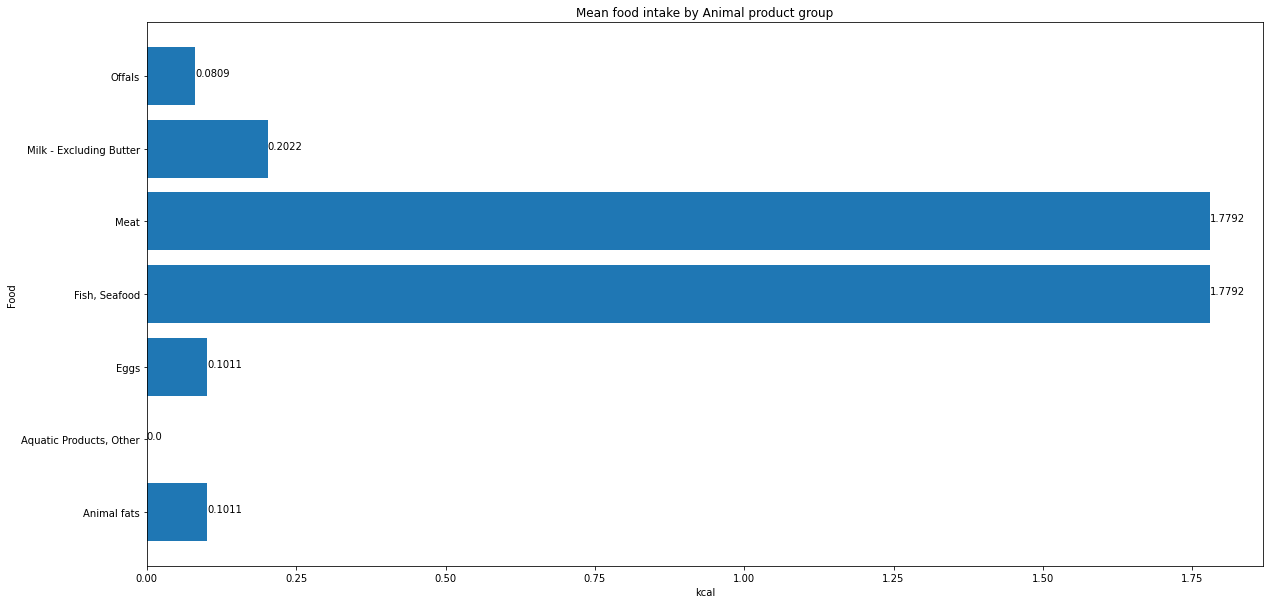

In [ ]:
fig = plt.figure(figsize = (20, 10))

# creating the bar plot
plt.barh(feature_2, bar_2)
#plt.barh(feature,bar_1)

for index, value in enumerate(bar_2):
    plt.text(value, index, str(value))

plt.xlabel("kcal")
plt.ylabel("Food")
plt.title("Mean food intake by Animal product group")
plt.show()

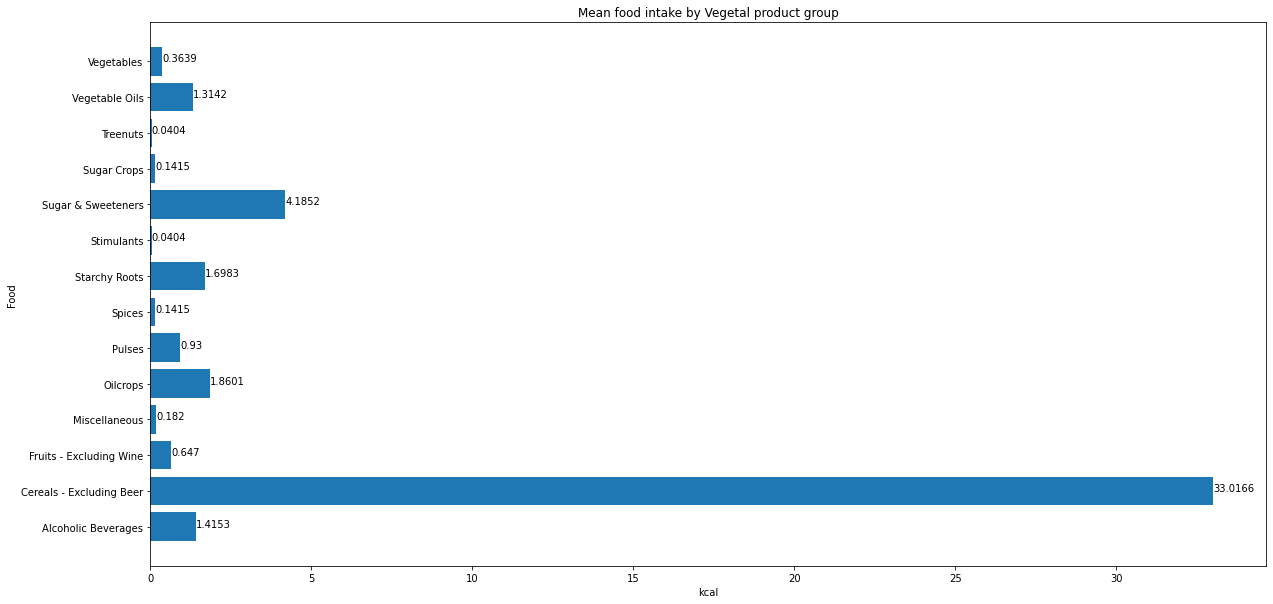

In [ ]:
fig = plt.figure(figsize = (20, 10))

# creating the bar plot
plt.barh(feature_3, bar_3)
#plt.barh(feature,bar_1)

for index, value in enumerate(bar_3):
    plt.text(value, index, str(value))

plt.xlabel("kcal")
plt.ylabel("Food")
plt.title("Mean food intake by Vegetal product group")
plt.show()

In [ ]:
import io
from google.colab import files
uploaded = files.upload()
food_dataset = pd.read_csv(io.BytesIO(uploaded['Supply_Food_Data_Descriptions.csv']))
food_dataset.head()
print(food_dataset)

Saving Supply_Food_Data_Descriptions.csv to Supply_Food_Data_Descriptions.csv
                  Categories                                              Items
0        Alcoholic Beverages  Alcohol, Non-Food; Beer; Beverages, Alcoholic;...
1                Animal fats  Butter, Ghee; Cream; Fats, Animals, Raw; Fish,...
2            Animal Products  Aquatic Animals, Others; Aquatic Plants; Bovin...
3    Aquatic Products, Other  Aquatic Animals, Others; Aquatic Plants; Meat,...
4   Cereals - Excluding Beer  Barley and products; Cereals, Other; Maize and...
5                       Eggs                                               Eggs
6              Fish, Seafood  Cephalopods; Crustaceans; Demersal Fish; Fresh...
7    Fruits - Excluding Wine  Apples and products; Bananas; Citrus, Other; D...
8                       Meat  Bovine Meat; Meat, Other; Mutton & Goat Meat; ...
9    Milk - Excluding Butter                            Milk - Excluding Butter
10             Miscellaneous              

Printing Food deatils

In [ ]:
food_dataset1=pd.DataFrame(food_dataset)
print(food_dataset1.values)

[['Alcoholic Beverages'
  'Alcohol, Non-Food; Beer; Beverages, Alcoholic; Beverages, Fermented; Wine']
 ['Animal fats'
  'Butter, Ghee; Cream; Fats, Animals, Raw; Fish, Body Oil; Fish, Liver Oil']
 ['Animal Products'
  'Aquatic Animals, Others; Aquatic Plants; Bovine Meat; Butter, Ghee; Cephalopods; Cream; Crustaceans; Demersal Fish; Eggs; Fats, Animals, Raw; Fish, Body Oil; Fish, Liver Oil; Freshwater Fish; Marine Fish, Other; Meat, Aquatic Mammals; Meat, Other; Milk - Excluding Butter; Molluscs, Other; Mutton & Goat Meat; Offals, Edible; Pelagic Fish; Pigmeat; Poultry Meat']
 ['Aquatic Products, Other'
  'Aquatic Animals, Others; Aquatic Plants; Meat, Aquatic Mammals']
 ['Cereals - Excluding Beer'
  'Barley and products; Cereals, Other; Maize and products; Millet and products; Oats; Rice (Milled Equivalent); Rye and products; Sorghum and products; Wheat and products']
 ['Eggs' 'Eggs']
 ['Fish, Seafood'
  'Cephalopods; Crustaceans; Demersal Fish; Freshwater Fish; Marine Fish, Other; M